In [1]:
# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("dark_background")

In [2]:
imagePaths = list(paths.list_images("data/my_data/img/"))
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

In [3]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
    name = imagePath.split(os.path.sep)[-2]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # detect the (x, y)-coordinates of the bounding boxes
    # corresponding to each face in the input image
    boxes = face_recognition.face_locations(rgb, model="hog")
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        # add each encoding + name to our set of known names and
        # encodings
        knownEncodings.append(encoding)
        knownNames.append(name.split("/")[-1])

[INFO] processing image 1/28
[INFO] processing image 2/28
[INFO] processing image 3/28
[INFO] processing image 4/28
[INFO] processing image 5/28
[INFO] processing image 6/28
[INFO] processing image 7/28
[INFO] processing image 8/28
[INFO] processing image 9/28
[INFO] processing image 10/28
[INFO] processing image 11/28
[INFO] processing image 12/28
[INFO] processing image 13/28
[INFO] processing image 14/28
[INFO] processing image 15/28
[INFO] processing image 16/28
[INFO] processing image 17/28
[INFO] processing image 18/28
[INFO] processing image 19/28
[INFO] processing image 20/28
[INFO] processing image 21/28
[INFO] processing image 22/28
[INFO] processing image 23/28
[INFO] processing image 24/28
[INFO] processing image 25/28
[INFO] processing image 26/28
[INFO] processing image 27/28
[INFO] processing image 28/28


In [4]:
# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open("data/my_data/all_face_detection.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] serializing encodings...


In [41]:
dataImage = "data/my_data/test_subash/IMG_20200830_152341892.jpg"
pklLoc = "data/my_data/all_face_detection.pickle"
# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open(pklLoc, "rb").read())
# load the input image and convert it from BGR to RGB
image = cv2.imread(dataImage)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb, model="hog")
encodings = face_recognition.face_encodings(rgb, boxes)
# initialize the list of names for each face detected
names = []

# loop over the facial embeddings
for encoding in encodings:
    # attempt to match each face in the input image to our known
    # encodings
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    # check to see if we have found a match
    if True in matches:
        # find the indexes of all matched faces then initialize a
        # dictionary to count the total number of times each face
        # was matched
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}
        # loop over the matched indexes and maintain a count for
        # each recognized face face
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1
        # determine the recognized face with the largest number of
        # votes (note: in the event of an unlikely tie Python will
        # select first entry in the dictionary)
        name = max(counts, key=counts.get)

    # update the list of names
    names.append(name)

[INFO] loading encodings...
[INFO] recognizing faces...


In [ ]:
data

data/my_data/img/subash ale


Text(0.5,1,'Image')

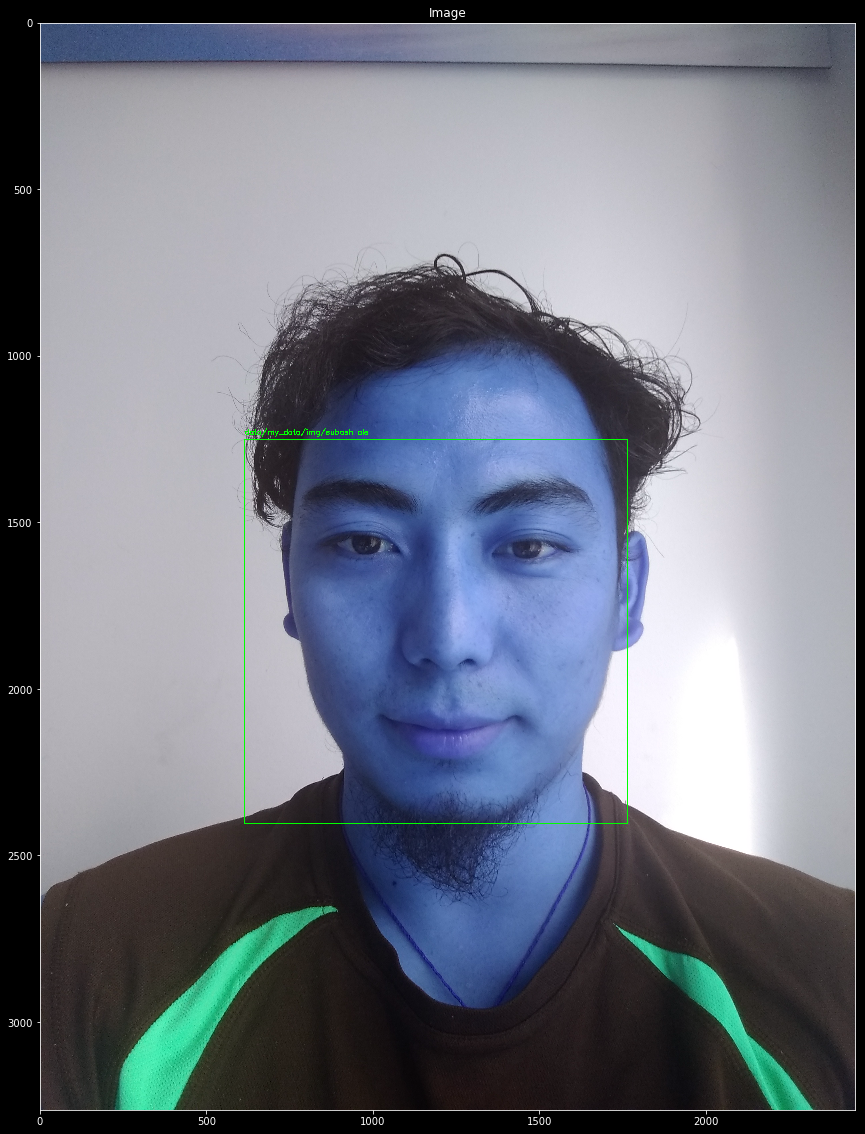

In [42]:
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
    # draw the predicted face name on the image
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
    print(name)
# show the output image
plt.figure(figsize = (25,20))
plt.imshow(image)
plt.title("Image")